<h2> Data Processing</h2>
<p> In this section we will have analyze and perform data analysis on augmented data.<br>
We will also preprocess and prepare data for models
</p>

In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
results = {
    'cnn_train_accuracy': 0,
    'cnn_test_accuracy': 0,
    'rnn_train_accuracy': 0,
    'rnn_test_accuracy': 0,
    'knn_train_accuracy':0,
    'knn_test_accuracy':0,
}

In [2]:
data = pd.read_csv('augmented_data.csv')

In [3]:
data.head()

,crop,moisture,temp,pump
0,cotton,638,16.0,1
1,cotton,522,18.0,1
2,cotton,741,22.0,1
3,cotton,798,32.0,1
4,cotton,690,28.0,1


<h4> Label Encoder </h4>
<p> We will take crop column and label encode it. 
<br>Label Encoding makes it possible for possible to interpret and comprehend the data by assigning each category a unique numerical variable. </p>

In [5]:
# Encode crop column to numerical format

label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['crop'])

In [6]:
data.sample(5)

,crop,moisture,temp,pump
36,0,665,32.000000,1
100,0,89,42.000000,0
227,0,737,36.355058,1
4,0,690,28.000000,1
347,0,264,17.533881,0


<h3> Data splits and standarization </h3>
<p>We will use features - Crop, Moisture and temperature to predict label 0 or 1.<br>
From above sample, we know that mositure and temperature are not standarized i.e they aren't on same scale.<br>
The main goal is to bring different feature variables to a similar scale, to ensure that certain features don't dominate others due to magnitudinal differences.</p>

In [7]:
# Split Features and Label
X = data.drop('pump', axis=1)
y = data['pump']

In [18]:
# Standardization
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [24]:
# Reshape X for CNN input
X = X.reshape((X.shape[0], X.shape[1], 1))

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 3, 1), (100, 3, 1), (400,), (100,))

<h3> CNN model and architecture</h3>
<p> In this section we will design a custom Convolutional Neural Network classifier.</p>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [48]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

c:\Users\admin\miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
# Train the model
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7434 - loss: 0.5865 - val_accuracy: 0.6800 - val_loss: 0.6779
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7255 - loss: 0.6015 - val_accuracy: 0.6800 - val_loss: 0.6667
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7260 - loss: 0.6151 - val_accuracy: 0.6700 - val_loss: 0.6628
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7113 - loss: 0.6188 - val_accuracy: 0.6700 - val_loss: 0.6631
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6628 - loss: 0.6408 - val_accuracy: 0.6800 - val_loss: 0.6757
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7142 - loss: 0.6127 - val_accuracy: 0.6800 - val_loss: 0.6680
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7382 - loss: 0.5904 - val_accuracy: 0.6800 - val_loss: 0.6654
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6697 - loss: 0.6396 - val_accuracy: 0.6600 - 

In [59]:
# Save the model weights
model.save_weights('cnn_weights.weights.h5')

In [60]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6510 - loss: 0.6390
Test Loss: 0.6604800224304199
Test Accuracy: 0.6299999952316284


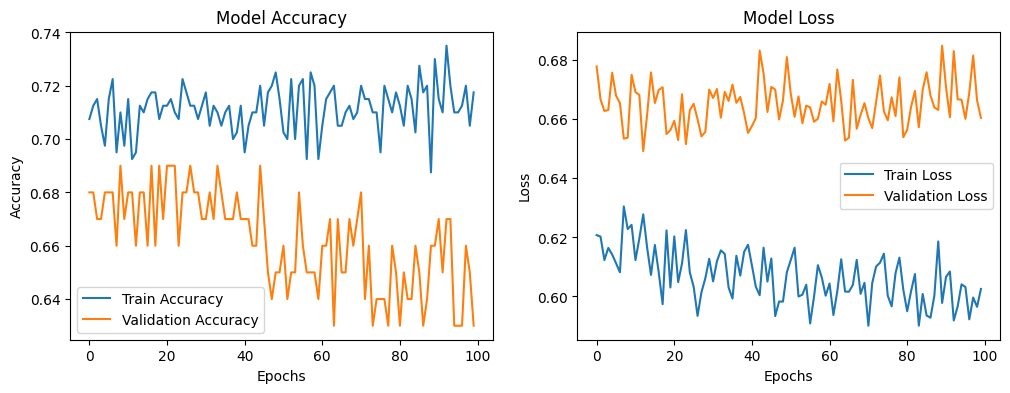

In [63]:
# Plotting training & validation accuracy and loss curves
def plot_history(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot the history
plot_history(history)